### Discussion Related with outliers and Impact on Machine Learning

#### Should outliers be removed everytime ?

##### The answer to this is NO!!

The outliers may play an important role in some cases like fraud detection. In this detection, some outliers may help us to detect suspicious activities.
Any sort of anamoly detection, outliers play an important role to detect.

And in some cases it may be harmful and should be removed

##### So the answer to this question depends upon the problem statement or context of the problem.The outliers may deserve some special attention like in credit card fraud detection and in some of the use cases it may be completely ignored.

In [ ]:
##---------------------

### Which Machine Learning Models Are Sensitive To Outliers?
 1. Naivye Bayes Classifier--- Not Sensitive To Outliers
 2. SVM-------- Not Sensitive To Outliers
 3. Linear Regression---------- Sensitive To Outliers
 4. Logistic Regression------- Sensitive To Outliers
 5. Decision Tree Regressor or Classifier---- Not Sensitive
 6. Ensemble(RF,XGboost,GB)------- Not Sensitive
 7. KNN--------------------------- Not Sensitive
 8. Kmeans------------------------ Sensitive
 9. Hierarichal------------------- Sensitive
 10. PCA-------------------------- Sensitive
 11. Neural Networks-------------- Sensitive

In [2]:
## The maths behind all these algorithms makes it easy for us to guess whether it is sensitive or not

##### So if tomorrow we have given a problem statement of credit card detection , we should apply all those models which are ofcourse not sensitive to outliers!
##### So this knowledge of impact of outliers on sensitivity of ml models is very neccessary

In [4]:
##---------------------------------

In [5]:
import pandas as pd
df = pd.read_csv('titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling of outliers !

In [7]:
df['Age'].isnull().sum()

177

In [8]:
import seaborn as sns

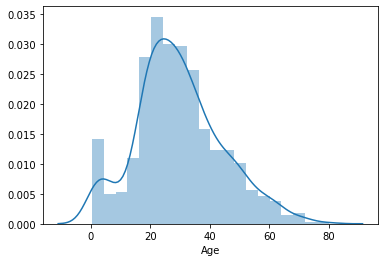

In [9]:
sns.distplot(df['Age'].dropna())

In [10]:
## It is normally distributed.

In [ ]:
## Here there are almost no outliers , but we can create few and just see how the graph changes 

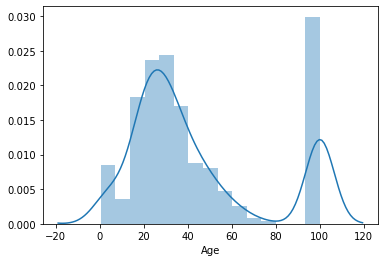

In [14]:
sns.distplot(df['Age'].fillna(100))

In [ ]:
##-------------------------------------------------

In [ ]:
## Now , we know that here outlier plays no important role and we can remove them

#####  Gaussian Distribution

In [15]:
## To have a idea whether the feature is normally distributed and to check the outliers we use plotting techniques

Text(0, 0.5, 'No. of passengers')

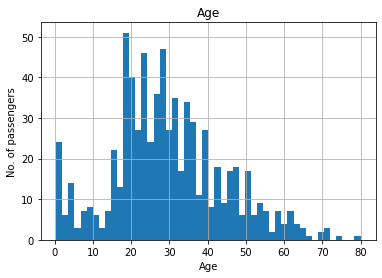

In [16]:
fig=df.Age.hist(bins=50)
fig.set_title("Age")
fig.set_xlabel('Age')
fig.set_ylabel('No. of passengers')

In [17]:
## Here we can see it is normally distributed and have few outliers around 80

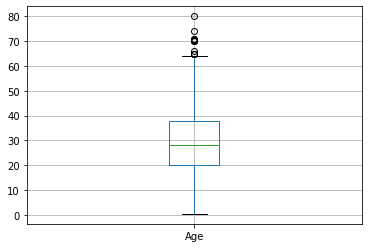

In [19]:
figure=df.boxplot(column="Age")

In [20]:
## Here we can see , above the range value 65 , there are few outliers  

In [21]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### The outliers can be removed using two techniques: 
 1. Z-score (u + 3std)
 2. IQR Range

if the data is N.D, then we most probably use the first technique (ie.: Z-score)

and if the data is skewed, then we most probably use the second technique (ie: IQR range) to remove the outliers.

In [22]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries with z-score (u + 3std) which differentiates the outliers

In [25]:
lb=df.Age.mean() - 3 * df.Age.std()
ub=df.Age.mean() + 3 * df.Age.std()
print(lb),print(ub),print(df.Age.mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [27]:
## We can ignore lower bound (lb) as age cannot be -ve
## Therefore , our threshold value for outliers is 73.(any value above 73 would be considered as outlier)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data=df.copy()

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data.loc[data['Age']>=73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,73.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,73.0,0,0,347060,7.775,NaN,S


In [52]:
data.loc[data['Age']>73,'Age']=73

In [53]:
## Here , we are not removing the outliers instead just replacing them with (u+3std) value(73).
## This also how we can handle outliers.

In [54]:
data.loc[data['Age']>73]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


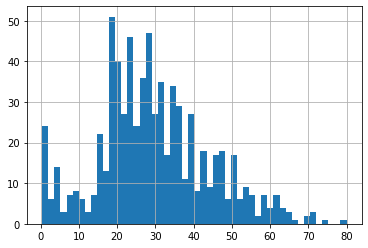

In [49]:
  df['Age'].hist(bins=50)    

In [56]:
df.Age.max()

80.0

In [57]:
data[data['Age']>73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [58]:
data.Age.max()


73.0

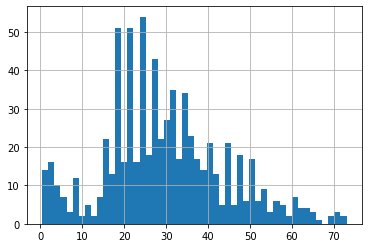

In [60]:
data['Age'].hist(bins=50)

In [61]:
## This is how we handle the outliers.

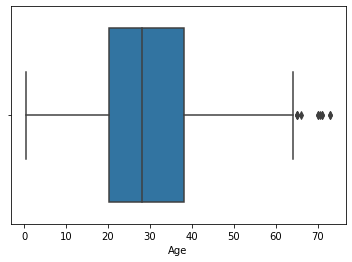

In [66]:
sns.boxplot(data['Age'])     ## Here may be some outliers visible, but that's fine we have handled extreme outliers.
                    

In [65]:
data.Age.describe()    ## Boxplot values matches

count    714.000000
mean      29.687913
std       14.490589
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.000000
Name: Age, dtype: float64

### Now, if features are Skewed we use the below technique:
#### IQR Range

Text(0, 0.5, 'No of passenger')

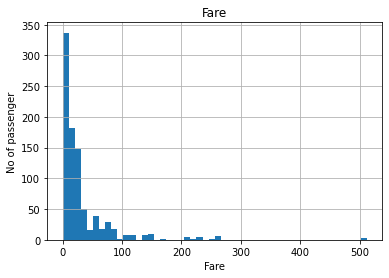

In [67]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Now as we can see, the data is right skewed.
So we will use the IQR technique to handle the outliers

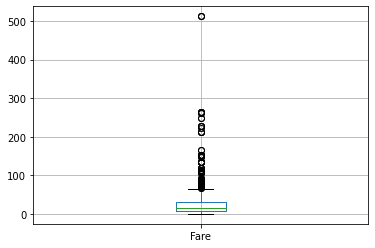

In [68]:

df.boxplot(column="Fare")

In [69]:
df['Fare'].describe() ## Huge difference in 75% and max.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [71]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [72]:
LB=df['Fare'].quantile(0.25) - (IQR*1.5)
UB=df['Fare'].quantile(0.75) + (IQR*1.5)
print(UB),print(LB)

65.6344
-26.724


(None, None)

In [73]:
## We can ignore lower bound (lb) as age cannot be -ve
## and consider ub as our threshold

In [74]:
## But !!!
## As the data is skewed it probably may have extreme outliers and we can also see from graph(500)

In [75]:
## And using 65 as on outlier threshold in this dataset makes no sense as there are extreme outliers and many values over 65.

In [76]:
## So in this case, to handle the extreme outliers we multiply IQR  by 3 in formula

In [78]:
### Extreme outliers
LB=df['Fare'].quantile(0.25) - (IQR*3)
UB=df['Fare'].quantile(0.75) + (IQR*3)
print(UB),print(LB)

100.2688
-61.358399999999996


(None, None)

In [79]:
## Now this ub(100), is perfect threshold in this case as our dataset is skewed.

#### Tip: If the feature is skewed, calculate extreme outliers and on basis of that set the ub and lb

In [80]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
data.loc[data['Fare']>100,'Fare']=100  ## All outliers replaced by 100.

In [83]:
data.loc[data['Fare']>100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [85]:
df.loc[df['Fare']>100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


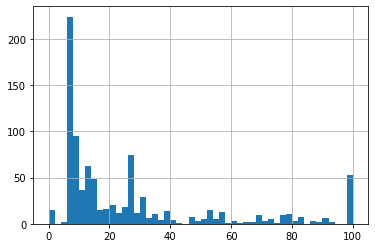

In [87]:
data['Fare'].hist(bins=50)

In [88]:
## The max value in our data is 100 and before it was 500.
## So this is how we handle the outliers

##### Handling outliers does not mean converting the data into N.D or something, just removing or replacing the extreme values is what it means

In [90]:
## Now, you can check the accuracy and other features of different ml model by comparing it with data with outliers and data without outliers

In [91]:
## TO BE CONTINUED AFTER ML PLAYLIST !!!